<a href="https://colab.research.google.com/github/hadilaff/K-Means-Clustering-Unsupervised-ML/blob/main/Task%202_Prediciton_using_unsubervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Prediction using unsupervised machine learning
From the Iris dataset, we will first predict the optimum number of clusters, and then we will represent those clusters visually.




# Importing the required libraries



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets



# Loading the Iris Dataset

In [ ]:
df = datasets.load_iris()
df=pd.DataFrame(df.data,columns=df.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Data Preparing**

In [ ]:
df.shape

(150, 4)

In [ ]:
#verify if any null value is present
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
#data statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


# Determining the value of K

In [ ]:
x= df.iloc[:, [0,1,2,3]].values  #the values of each column

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) #Sum of squared distances of samples #to their closest cluster center
   

#Plotting the graph onto a line graph to observe the pattern

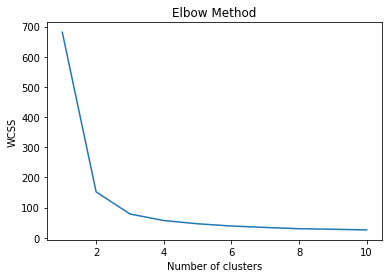

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# The optimal clusters are formed where the elbow occurs. In this case k = 3


#Creating K-Means Classifier

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x)


#Visualizing the cluster data


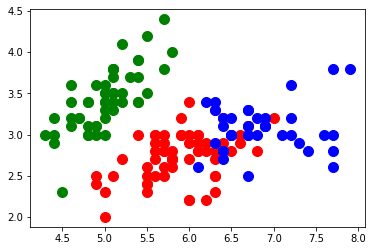

In [ ]:
#Visualising the clusters

plt.scatter(x[pred_y==0,0], x[pred_y==0, 1], s=100, c='red', label='Iris-setosa')

plt.scatter(x[pred_y==1,0], x[pred_y==1, 1], s=100, c='green', label='Iris-versicolour')

plt.scatter(x[pred_y==2,0], x[pred_y==2, 1], s=100, c='blue', label='Iris-virginica')



# Plotting the centroids of the *clusters*

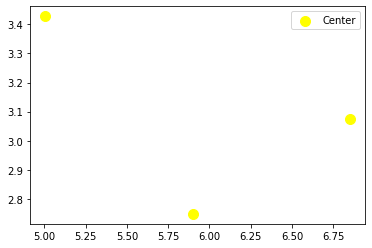

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='yellow',label='Center')
plt.legend()

#Combining both the above graphs together
#Visualising the clusters and centers

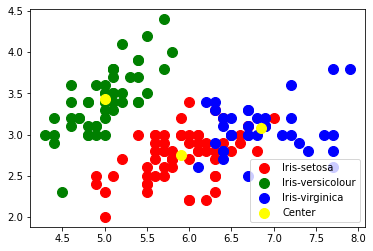

In [ ]:
plt.scatter(x[pred_y==0,0], x[pred_y==0, 1], s=100, c='red', label='Iris-setosa')

plt.scatter(x[pred_y==1,0], x[pred_y==1, 1], s=100, c='green', label='Iris-versicolour')

plt.scatter(x[pred_y==2,0], x[pred_y==2, 1], s=100, c='blue', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='yellow',label='Center')
plt.legend()